#### 교통사고 데이터 전처리

In [15]:
#import data
import pandas as pd

# 엑셀 파일 불러오기
excel_path1 = '/Users/kyuree/Desktop/pds_capstone1/dataset/accidentInfoList.xlsx'
xls1 = pd.ExcelFile(excel_path1)

# 각 시트를 데이터프레임으로 읽어와 리스트에 저장
dfs1 = [pd.read_excel(xls1, sheet_name=sheet_name) for sheet_name in xls1.sheet_names]

# 시트별 데이터프레임을 행 기준으로 통합
accident_origin = pd.concat(dfs1, axis=0, ignore_index=True)

# 결과 출력
accident_origin

,사고일시,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,도로형태,...,요일,노면상태,기상상태,가해운전자 차종,가해운전자 성별,가해운전자 연령,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014년 9월 7일 01시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,교차로 - 교차로부근,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014년 9월 8일 03시,서울특별시 노원구 공릉동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014년 10월 18일 01시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,보행자보호의무위반,교차로 - 교차로부근,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014년 10월 27일 03시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,단일로 - 횡단보도상,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014년 10월 31일 01시,서울특별시 노원구 월계동,경상사고,0,0,1,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021년 4월 17일 00시,서울특별시 노원구 상계동,중상사고,0,1,3,0,차대사람 - 차도통행중,안전운전불이행,기타 - 기타,...,토요일,포장 - 건조,맑음,승용,남,34세,보행자,남,40세,중상
192,2021년 7월 13일 00시,서울특별시 노원구 상계동,중상사고,0,1,0,1,차대사람 - 차도통행중,안전운전불이행,단일로 - 터널,...,화요일,포장 - 건조,맑음,승합,남,51세,보행자,남,46세,중상
193,2021년 8월 11일 04시,서울특별시 노원구 상계동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,...,수요일,포장 - 건조,맑음,승용,남,75세,보행자,여,51세,경상
194,2021년 8월 12일 03시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,...,목요일,포장 - 건조,맑음,이륜,남,40세,보행자,여,24세,중상


In [16]:
accident_origin.columns

Index(['사고일시', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형', '법규위반',
       '도로형태', '가해운전자 상해정도', '사고번호', '요일', '노면상태', '기상상태', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [17]:
#1. 필요한 컬럼만 필터링 
''' 
'사고일시', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형','법규위반','도로형태', '가해운전자 상해정도','피해운전자 상해정도'
'''
filtered_accident = accident_origin[['사고일시', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형','법규위반','도로형태', '가해운전자 상해정도','피해운전자 상해정도']]
filtered_accident


#사고일시 -> 사고발생년도 / 월 / 일 / 시간으로 각각 구분하는 컬럼으로 재구성
#시군구 -> 서울특별시 노원구 / **동 으로 구분하는 컬럼 생성
#사고유형 -> 차대사람 / 세부사고유형 -> 횡단중으로 컬럼 분리


,사고일시,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,도로형태,가해운전자 상해정도,피해운전자 상해정도
0,2014년 9월 7일 01시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,교차로 - 교차로부근,상해없음,NaN
1,2014년 9월 8일 03시,서울특별시 노원구 공릉동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,상해없음,NaN
2,2014년 10월 18일 01시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,보행자보호의무위반,교차로 - 교차로부근,상해없음,NaN
3,2014년 10월 27일 03시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,단일로 - 횡단보도상,상해없음,NaN
4,2014년 10월 31일 01시,서울특별시 노원구 월계동,경상사고,0,0,1,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,상해없음,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021년 4월 17일 00시,서울특별시 노원구 상계동,중상사고,0,1,3,0,차대사람 - 차도통행중,안전운전불이행,기타 - 기타,상해없음,중상
192,2021년 7월 13일 00시,서울특별시 노원구 상계동,중상사고,0,1,0,1,차대사람 - 차도통행중,안전운전불이행,단일로 - 터널,부상신고,중상
193,2021년 8월 11일 04시,서울특별시 노원구 상계동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,상해없음,경상
194,2021년 8월 12일 03시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,상해없음,중상


In [18]:
len(filtered_accident.loc[2,'사고일시'])

17

In [19]:
#사고일시 -> 사고발생년도 / 월 / 일 / 시간으로 각각 구분하는 컬럼으로 재구성

filtered_accident['사고일시'] = filtered_accident['사고일시'].str.replace(' ', '') # 띄어쓰기 제거

for i in range(len(filtered_accident)):
    if len(filtered_accident.loc[i,'사고일시']) ==12:
        filtered_accident.loc[i,'사고발생_년도'] = filtered_accident.loc[i, '사고일시'][:5]
        filtered_accident.loc[i,'사고발생_월일'] = filtered_accident.loc[i, '사고일시'][5:9]
        filtered_accident.loc[i,'사고발생_시간'] = filtered_accident.loc[i, '사고일시'][9:]
    elif len(filtered_accident.loc[i,'사고일시']) ==13:
        filtered_accident.loc[i,'사고발생_년도'] = filtered_accident.loc[i, '사고일시'][:5]
        filtered_accident.loc[i,'사고발생_월일'] = filtered_accident.loc[i, '사고일시'][5:10]
        filtered_accident.loc[i,'사고발생_시간'] = filtered_accident.loc[i, '사고일시'][10:]
    else:
        filtered_accident.loc[i,'사고발생_년도'] = filtered_accident.loc[i, '사고일시'][:5]
        filtered_accident.loc[i,'사고발생_월일'] = filtered_accident.loc[i, '사고일시'][5:11]
        filtered_accident.loc[i,'사고발생_시간'] = filtered_accident.loc[i, '사고일시'][11:]
filtered_accident


/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/872350594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident['사고일시'] = filtered_accident['사고일시'].str.replace(' ', '') # 띄어쓰기 제거
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/872350594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident.loc[i,'사고발생_년도'] = filtered_accident.loc[i, '사고일시'][:5]
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/872350594.py:8: SettingWithCopyWar

,사고일시,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,도로형태,가해운전자 상해정도,피해운전자 상해정도,사고발생_년도,사고발생_월일,사고발생_시간
0,2014년9월7일01시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,교차로 - 교차로부근,상해없음,NaN,2014년,9월7일,01시
1,2014년9월8일03시,서울특별시 노원구 공릉동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,상해없음,NaN,2014년,9월8일,03시
2,2014년10월18일01시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,보행자보호의무위반,교차로 - 교차로부근,상해없음,NaN,2014년,10월18일,01시
3,2014년10월27일03시,서울특별시 노원구 상계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,단일로 - 횡단보도상,상해없음,NaN,2014년,10월27일,03시
4,2014년10월31일01시,서울특별시 노원구 월계동,경상사고,0,0,1,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,상해없음,NaN,2014년,10월31일,01시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021년4월17일00시,서울특별시 노원구 상계동,중상사고,0,1,3,0,차대사람 - 차도통행중,안전운전불이행,기타 - 기타,상해없음,중상,2021년,4월17일,00시
192,2021년7월13일00시,서울특별시 노원구 상계동,중상사고,0,1,0,1,차대사람 - 차도통행중,안전운전불이행,단일로 - 터널,부상신고,중상,2021년,7월13일,00시
193,2021년8월11일04시,서울특별시 노원구 상계동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,단일로 - 기타,상해없음,경상,2021년,8월11일,04시
194,2021년8월12일03시,서울특별시 노원구 월계동,중상사고,0,1,0,0,차대사람 - 횡단중,신호위반,교차로 - 교차로부근,상해없음,중상,2021년,8월12일,03시


In [20]:
#확인
print(filtered_accident['사고발생_년도'].value_counts())
print(filtered_accident['사고발생_월일'].value_counts())
print(filtered_accident['사고발생_시간'].value_counts())

2018년    42
2017년    38
2016년    34
2015년    33
2019년    21
2014년    12
2020년     9
2021년     7
Name: 사고발생_년도, dtype: int64
3월21일     4
1월1일      3
10월22일    3
10월18일    3
5월12일     3
         ..
8월26일     1
7월28일     1
6월25일     1
6월18일     1
8월31일     1
Name: 사고발생_월일, Length: 149, dtype: int64
00시    55
01시    39
05시    32
04시    27
02시    25
03시    18
Name: 사고발생_시간, dtype: int64


In [21]:
#시군구 -> 서울특별시 노원구 / **동 으로 구분하는 컬럼 생성
filtered_accident['시군구'].value_counts()

for i in range(len(filtered_accident)):
    filtered_accident.loc[i,'행정동'] = filtered_accident.loc[i,'시군구'][10:]
filtered_accident[['시군구','행정동']]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/1288023165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident.loc[i,'행정동'] = filtered_accident.loc[i,'시군구'][10:]


,시군구,행정동
0,서울특별시 노원구 월계동,월계동
1,서울특별시 노원구 공릉동,공릉동
2,서울특별시 노원구 상계동,상계동
3,서울특별시 노원구 상계동,상계동
4,서울특별시 노원구 월계동,월계동
...,...,...
191,서울특별시 노원구 상계동,상계동
192,서울특별시 노원구 상계동,상계동
193,서울특별시 노원구 상계동,상계동
194,서울특별시 노원구 월계동,월계동


In [22]:
#사고유형 -> 차대사람 / 세부사고유형 -> 횡단중으로 컬럼 분리
filtered_accident['사고유형'].value_counts()

for i in range(len(filtered_accident)):
    filtered_accident.loc[i,'사고세부유형'] = filtered_accident.loc[i,'사고유형'][7:]
filtered_accident[['사고유형','사고세부유형']]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/1468887418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident.loc[i,'사고세부유형'] = filtered_accident.loc[i,'사고유형'][7:]


,사고유형,사고세부유형
0,차대사람 - 횡단중,횡단중
1,차대사람 - 횡단중,횡단중
2,차대사람 - 횡단중,횡단중
3,차대사람 - 횡단중,횡단중
4,차대사람 - 횡단중,횡단중
...,...,...
191,차대사람 - 차도통행중,차도통행중
192,차대사람 - 차도통행중,차도통행중
193,차대사람 - 횡단중,횡단중
194,차대사람 - 횡단중,횡단중


In [23]:
#널값 확인
print(filtered_accident.isnull().sum())
print(filtered_accident['피해운전자 상해정도'].value_counts())

사고일시           0
시군구            0
사고내용           0
사망자수           0
중상자수           0
경상자수           0
부상신고자수         0
사고유형           0
법규위반           0
도로형태           0
가해운전자 상해정도     0
피해운전자 상해정도    79
사고발생_년도        0
사고발생_월일        0
사고발생_시간        0
행정동            0
사고세부유형         0
dtype: int64
중상      52
경상      50
사망       8
부상신고     6
상해없음     1
Name: 피해운전자 상해정도, dtype: int64


2014~2016년까지 약 79건 정도 피해운전자 상해정도 컬럼이 널값임. 어떻게 처리할지..

In [24]:
#도로형태 -> 도로형태(단일로) / 세부도로형태(기타)로 분리, 큰도로형태에 도로형태 넣음
for i in range(len(filtered_accident)):
    if filtered_accident.loc[i,'도로형태'][:2]=='기타':
        filtered_accident.loc[i,'세부도로형태'] = filtered_accident.loc[i,'도로형태'][5:]
        filtered_accident.loc[i,'큰도로형태'] = filtered_accident.loc[i,'도로형태'][:2]
    # elif len(filtered_accident.loc[i,'도로형태'][:3]) ==3:
    else:
        filtered_accident.loc[i,'세부도로형태'] = filtered_accident.loc[i,'도로형태'][6:]
        filtered_accident.loc[i,'큰도로형태'] = filtered_accident.loc[i,'도로형태'][:3]
filtered_accident[['도로형태','큰도로형태','세부도로형태']]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/2870970713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident.loc[i,'세부도로형태'] = filtered_accident.loc[i,'도로형태'][6:]
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_69372/2870970713.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accident.loc[i,'큰도로형태'] = filtered_accident.loc[i,'도로형태'][:3]


,도로형태,큰도로형태,세부도로형태
0,교차로 - 교차로부근,교차로,교차로부근
1,단일로 - 기타,단일로,기타
2,교차로 - 교차로부근,교차로,교차로부근
3,단일로 - 횡단보도상,단일로,횡단보도상
4,교차로 - 교차로부근,교차로,교차로부근
...,...,...,...
191,기타 - 기타,기타,기타
192,단일로 - 터널,단일로,터널
193,단일로 - 기타,단일로,기타
194,교차로 - 교차로부근,교차로,교차로부근


In [25]:
# len(filtered_accident.loc[195,'도로형태'][:2])

In [26]:
filtered_accident['세부도로형태'].value_counts()

기타           82
교차로부근        38
교차로안         37
교차로횡단보도내     23
횡단보도상        10
횡단보도부근        2
교량            2
지하차도(도로)내     1
터널            1
Name: 세부도로형태, dtype: int64

In [27]:
#최종 전처리된 교통사고 데이터
res_accident = filtered_accident[['사고발생_년도','사고발생_월일','사고발생_시간','행정동','사고내용','사망자수','중상자수', '경상자수', '부상신고자수','사고세부유형', '법규위반',
       '큰도로형태','세부도로형태', '가해운전자 상해정도', '피해운전자 상해정도']]
res_accident

,사고발생_년도,사고발생_월일,사고발생_시간,행정동,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고세부유형,법규위반,큰도로형태,세부도로형태,가해운전자 상해정도,피해운전자 상해정도
0,2014년,9월7일,01시,월계동,중상사고,0,1,0,0,횡단중,안전운전불이행,교차로,교차로부근,상해없음,NaN
1,2014년,9월8일,03시,공릉동,경상사고,0,0,1,0,횡단중,안전운전불이행,단일로,기타,상해없음,NaN
2,2014년,10월18일,01시,상계동,중상사고,0,1,0,0,횡단중,보행자보호의무위반,교차로,교차로부근,상해없음,NaN
3,2014년,10월27일,03시,상계동,중상사고,0,1,0,0,횡단중,안전운전불이행,단일로,횡단보도상,상해없음,NaN
4,2014년,10월31일,01시,월계동,경상사고,0,0,1,0,횡단중,신호위반,교차로,교차로부근,상해없음,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2021년,4월17일,00시,상계동,중상사고,0,1,3,0,차도통행중,안전운전불이행,기타,기타,상해없음,중상
192,2021년,7월13일,00시,상계동,중상사고,0,1,0,1,차도통행중,안전운전불이행,단일로,터널,부상신고,중상
193,2021년,8월11일,04시,상계동,경상사고,0,0,1,0,횡단중,안전운전불이행,단일로,기타,상해없음,경상
194,2021년,8월12일,03시,월계동,중상사고,0,1,0,0,횡단중,신호위반,교차로,교차로부근,상해없음,중상


In [31]:
# 데이터프레임을 CSV 파일로 저장
res_accident.to_csv('kr_교통사고데이터_전처리.csv', index=False)

#### 점멸신호 운영현황 데이터 처리

In [48]:
# 엑셀 파일 불러오기
excel_path2 = '/Users/kyuree/Desktop/pds_capstone1/dataset/점멸신호운영현황_원본.xlsx'
xls2 = pd.ExcelFile(excel_path2)

# 각 시트를 데이터프레임으로 읽어와 리스트에 저장
always_sign = pd.read_excel(xls2, sheet_name='Table 1',header=1)
time_sign = pd.read_excel(xls2, sheet_name='Table 2',header=0)

always_sign


,연번,교번,시스템,경찰서,교차로명,연동,기하\n구조
0,1,162,표준,광진,중곡119안전센터,메인,단
1,2,233,표준,중랑,중화지구대,메인,단
2,3,336,표준,서대문,북아현119안전센터,메인,단
3,4,469,표준,서대문,e편한세상신촌305동,메인,3
4,5,764,표준,종로,감사원앞,메인,3
...,...,...,...,...,...,...,...
112,113,4935,표준,강서,마곡필네이쳐,NaN,3
113,114,4938,표준,강서,수명산마트,NaN,4
114,115,4939,표준,강서,명덕외고기숙사,NaN,4
115,116,4939,표준,강서,명덕외고기숙사,서측1,3


In [49]:
time_sign

,연번,교번,시스템,경찰서,교차로명,연동,기하\n구조,점멸시간,비고(날짜)
0,1,4,표준,종암,월곡초교,메인,단,00:00~04:00,2026-03-18 00:00:00
1,2,8,표준,종암,사대부중,메인,3,00:00~04:00,2026-03-18 00:00:00
2,3,92,표준,광진,광장중학교,메인,단,20:00~07:00,2017-12-10 00:00:00
3,4,136,표준,성북,아리랑고개,동측,3,00:00~05:00,2013-04-09 00:00:00
4,5,182,표준,강북,예찬교회,메인,3,01:00~05:00,2017-11-09 00:00:00
...,...,...,...,...,...,...,...,...,...
1025,1026,4940,표준,강서,명덕외고정문,NaN,4,01:00~05:00,2004-03-19 00:00:00
1026,1027,4973,표준,수서,MS빌딩,NaN,단,01:00~05:00,2021-09-07 00:00:00
1027,1028,4983,표준,동작,구립양지어린이집앞,NaN,4,00:00~04:00,2018-08-22 00:00:00
1028,1029,4984,표준,서초,네이처힐501동앞,NaN,4,00:00~05:00,2022-10-19 00:00:00


##### 할 전처리
###### 1. 항시 점멸신호 -> 경찰서로 구분돼있는데 이를 자치구 명으로 바꾸어줌
###### 2. 엑셀로 변환과정에서 생긴 글자 인식 오류 -> 올바른 글자로 수정
###### 3. 운영시간 형식 수정 및 통일
###### 3-1. 평일 운영, 주말 운영 등 특징은 따로 컬럼으로 나타내주기
###### 4. 교차로별 경위도 값 추가
###### 5. 시간제 점멸신호 -> 비고란 날짜 값 년/ 월일로 값 구분


In [41]:
#1번 전처리
always_sign['경찰서'].unique()

array(['광진', '중랑', '서대문', '종로', '노원', '성동', '도봉', '종암', '성북', '용산', '은평',
       '혜화', '마포', '강북', '서부', '강서', '수서', '구로', '송파', '서초', '관악', '방배',
       '강동', '동작', '영등포'], dtype=object)

###### 대체할 값 정리
강서구 - 강서
강남구 - 수서
도봉구 - 도봉
송파구 - 송파
서대문구 - 서대문
종로구 - 종로,혜화
성동구 - 성동
동작구 - 동작
용산구 - 용산
중랑구 - 중랑
노원구 - 노우너
강동구 - 강동 , 갈동
구로구 - 구로
광진구 - 광진
영등포구 - 영등포
성북구 - 종암, 성북
서초구 - 방배, 서초
마포구 - 마포
은평구 - 서부, 은평
강북구 - 강북
관악구 - 관악
양천구 - 양천
동대문구 - 동대문
중구 - 남대문, 중부
금천구 - 금천

In [50]:
#항시 점멸 - 값 대체, 새로운 컬럼 생성
for i in range(len(always_sign)):
    if always_sign.loc[i,'경찰서'] =='혜화':
        always_sign.loc[i,'자치구명'] = '종로구'
    elif always_sign.loc[i,'경찰서'] =='수서':
        always_sign.loc[i,'자치구명'] = '강남구'
    elif always_sign.loc[i,'경찰서'] =='종암':
        always_sign.loc[i,'자치구명'] = '성북구'
    elif always_sign.loc[i,'경찰서'] =='방배':
        always_sign.loc[i,'자치구명'] = '서초구'
    elif always_sign.loc[i,'경찰서'] =='서부':
        always_sign.loc[i,'자치구명'] = '은평구'
    else:
        always_sign.loc[i,'자치구명'] = always_sign.loc[i,'경찰서']+'구'
always_sign

,연번,교번,시스템,경찰서,교차로명,연동,기하\n구조,자치구명
0,1,162,표준,광진,중곡119안전센터,메인,단,광진구
1,2,233,표준,중랑,중화지구대,메인,단,중랑구
2,3,336,표준,서대문,북아현119안전센터,메인,단,서대문구
3,4,469,표준,서대문,e편한세상신촌305동,메인,3,서대문구
4,5,764,표준,종로,감사원앞,메인,3,종로구
...,...,...,...,...,...,...,...,...
112,113,4935,표준,강서,마곡필네이쳐,NaN,3,강서구
113,114,4938,표준,강서,수명산마트,NaN,4,강서구
114,115,4939,표준,강서,명덕외고기숙사,NaN,4,강서구
115,116,4939,표준,강서,명덕외고기숙사,서측1,3,강서구


In [51]:
#시간제 점멸- 값 대체, 새로운 컬럼 생성
time_sign['경찰서'].unique()

array(['종암', '광진', '성북', '강북', '노원', '도봉', '마포', '성동', '중랑', '은평', '서부',
       '서대문', '용산', '중부', '종로', '혜화', '동대문', '남대문', '방배', '강동', '서초',
       '수서', '강서', '강남', '관악', '구로', '양천', '송파', '동작', '영등포', '금천', '갈동'],
      dtype=object)

In [52]:
for i in range(len(time_sign)):
    if time_sign.loc[i,'경찰서'] =='혜화':
        time_sign.loc[i,'자치구명'] = '종로구'
    elif time_sign.loc[i,'경찰서'] =='수서':
        time_sign.loc[i,'자치구명'] = '강남구'
    elif time_sign.loc[i,'경찰서'] =='종암':
        time_sign.loc[i,'자치구명'] = '성북구'
    elif time_sign.loc[i,'경찰서'] =='방배':
        time_sign.loc[i,'자치구명'] = '서초구'
    elif time_sign.loc[i,'경찰서'] =='서부':
        time_sign.loc[i,'자치구명'] = '은평구'
    elif time_sign.loc[i,'경찰서'] =='금천':
        time_sign.loc[i,'자치구명'] = '금천구'
    elif time_sign.loc[i,'경찰서'] =='갈동':
        time_sign.loc[i,'자치구명'] = '강동구'
    elif time_sign.loc[i,'경찰서'] =='남대문':
        time_sign.loc[i,'자치구명'] = '중구'
    elif time_sign.loc[i,'경찰서'] =='중부':
        time_sign.loc[i,'자치구명'] = '중구'
    elif time_sign.loc[i,'경찰서'] =='동대문':
        time_sign.loc[i,'자치구명'] = '동대문구'
    elif time_sign.loc[i,'경찰서'] =='양천':
        time_sign.loc[i,'자치구명'] = '양천구'
    else:
        time_sign.loc[i,'자치구명'] = time_sign.loc[i,'경찰서']+'구'
time_sign

,연번,교번,시스템,경찰서,교차로명,연동,기하\n구조,점멸시간,비고(날짜),자치구명
0,1,4,표준,종암,월곡초교,메인,단,00:00~04:00,2026-03-18 00:00:00,성북구
1,2,8,표준,종암,사대부중,메인,3,00:00~04:00,2026-03-18 00:00:00,성북구
2,3,92,표준,광진,광장중학교,메인,단,20:00~07:00,2017-12-10 00:00:00,광진구
3,4,136,표준,성북,아리랑고개,동측,3,00:00~05:00,2013-04-09 00:00:00,성북구
4,5,182,표준,강북,예찬교회,메인,3,01:00~05:00,2017-11-09 00:00:00,강북구
...,...,...,...,...,...,...,...,...,...,...
1025,1026,4940,표준,강서,명덕외고정문,NaN,4,01:00~05:00,2004-03-19 00:00:00,강서구
1026,1027,4973,표준,수서,MS빌딩,NaN,단,01:00~05:00,2021-09-07 00:00:00,강남구
1027,1028,4983,표준,동작,구립양지어린이집앞,NaN,4,00:00~04:00,2018-08-22 00:00:00,동작구
1028,1029,4984,표준,서초,네이처힐501동앞,NaN,4,00:00~05:00,2022-10-19 00:00:00,서초구


In [43]:
#확인
time_sign['자치구명'].unique()

array(['성북구', '광진구', '강북구', '노원구', '도봉구', '마포구', '성동구', '중랑구', '은평구',
       '서대문구', '용산구', '중구', '종로구', '동대문구', '서초구', '강동구', '강남구', '강서구',
       '관악구', '구로구', '양천구', '송파구', '동작구', '영등포구', '금천구'], dtype=object)

In [ ]:
#2번 전처리
# 2. 엑셀로 변환과정에서 생긴 글자 인식 오류 -> 올바른 글자로 수정(오류가 별로 없다 나중에)
###### 3. 운영시간 형식 수정 및 통일
###### 3-1. 평일 운영, 주말 운영 등 특징은 따로 컬럼으로 나타내주기
###### 4. 교차로별 경위도 값 추가
###### 5. 시간제 점멸신호 -> 비고란 날짜 값 년/ 월일로 값 구분


In [44]:
time_sign['교차로명'].unique()

array(['월곡초교', '사대부중', '광장중학교', '아리랑고개', '예찬교회', '세윤하이츠', '월계사슴2단지',
       '청구종합상가', '청계초교', '연촌초교', '위례정보산업고', '상계5동주민센터', '당고개역', '코오롱연립',
       '서진아파트', '동천학교', '용원초교', '방학중학교', '방학2동주민센터', '백운시장', '녹주아파트',
       '삼양로9길입구', '태릉가스충전소', '유창빌딩', '신방학중', '정의공주묘', '한솔부동산',
       '뚝도아리수정수센터', '번동한진아파트', '먹골파출소', '성신여대', '정릉3동주민센터', '56사단',
       '독바위역', '자양4동주민센터', '구산치안센터', '북서울꿈의숲후문', '주공326단지', '청원고교',
       '북한산온천', '온곡초교입구', '숭곡초교', '자양중입구', '명사약국앞', '공릉1수문', '중계롯데아파트',
       '공릉초교', '삼원수출포장', '면목7치안센터', '50번종점', '금란유치원', '입곡삼거리', '수색초교입구',
       '우이그린빌라', '은평경찰서', '신내대성아파트', '정릉대우아파트', '성신초교', '옥수삼성아파트후문',
       '창번2교', '돈암천주교회', '홍익중고입구', '쌍문청구아파트', '법종사', '면동초교',
       '공릉삼익아파트404동앞', '상계119안전센터', '면목본동파출소', '혜원여중고후문', '신내동성아파트',
       '신창교', '송곡관광고', '도봉산성당', '불광삼익아파트', '한양701동', '흥국사', '신성미소지음아파트',
       '상봉시장', '대주아파트앞', '북성초교앞', '아현중앙교회', '삼양중앙감리교회앞', '효문고', '유승약국',
       '금호고교', '삼각산아이원120동', '삼각산아이원108동', '해성교회', '성북1치안센터', '상계3치안센터',
       '트리마제앞', '월계어린이집', '

In [53]:
#3번 전처리
#과정 복잡한 거 고려해서 새롭게 데이터 프레임 생성
time_sign_t = time_sign[['연번','점멸시간']]
time_sign_t['점멸시간'].unique()

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30\n09:00~12:00', '23:00~05:00', '22:00~05:00',
       '18:00~07:00\n주말 항시점멸', '00:00~05:00(매일)\n11:30~14:00(매일)',
       '00:00~05:00(매일)\n11:00~17:00(월~토)', '00:00~05:00\n토,일 항시점멸',
       '평일 17:30~07:00\n(주말 : 항시점멸)',
       '토요일 14:00~00:00\n일요일 00:00~22:00 공휴일 10:00~22:00', '20:00~08:00',
       '평일 : 19:00~07:00\n주말 : 항시점멸', '평일 : 17:00~07:00\n주말 : 항시점멸',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '00:00~05:00\n(주말)00:00~07:00', '17:00~19:00',
       '00:00~06:00', '17:00~06:00', '20:00~07:00\n주말 전일점멸',
       '23:00~06:00', '평일 17:00~익일07:00\n주말 전일점멸', '19:00~07:00',
       '09:00~08:00', '22:00~07:30', '09:00~익일08:00',
       '평일: 21:00~08:00\n그외 전일점멸', '07:30~17:00\n일요일, 특수일 전일점멸'],
      dtype=object)

컬럼을 다음과 같이 구분
1. 매일1, 매일2 -> 하루 중 운영시간대가 두 종류임을 고려
- 하루 중 운영시간대가 한 종류인 건 매일2 컬럼 값을 0으로 둔다
2. 토요일 -> 주말에 특수하게 운영하는 것 고려
3. 일요일 -> 주말에 특수하게 운영하는 것 고려
4. 그외 -> 특수일 전일점멸  => '00:00~24:00'값 넣음
- 주말 둘다 운영하는 건 같은 값 넣음
- 평일엔 ~ 주말은 항시점멸 -> 항시점멸 값은 '00:00~24:00' 값 넣음
- 컬럼에 해당하는 값이 없는 케이스는 0으로 둔다

In [54]:
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('익일', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('항시', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('전일', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace(' ', '') # 띄어쓰기 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('(', '') # ( 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace(')', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('매일', '') # ( 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('평일', '') # ) 제거

time_sign_t['점멸시간'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/3877715729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('익일', '') # ) 제거
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/3877715729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('항시', '') # ) 제거
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/3877715729.py:3: SettingWithCopyWarning: 
A value

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30\n09:00~12:00', '23:00~05:00', '22:00~05:00',
       '18:00~07:00\n주말점멸', '00:00~05:00\n11:30~14:00',
       '00:00~05:00\n11:00~17:00월~토', '00:00~05:00\n토,일점멸',
       '17:30~07:00\n주말:점멸',
       '토요일14:00~00:00\n일요일00:00~22:00공휴일10:00~22:00', '20:00~08:00',
       ':19:00~07:00\n주말:점멸', ':17:00~07:00\n주말:점멸', '18:00~06:00',
       '08:00~09:00', '20:00~05:00', '09:30~06:00', '21:00~06:00',
       '00:00~05:00\n주말00:00~07:00', '17:00~19:00', '00:00~06:00',
       '17:00~06:00', '20:00~07:00\n주말점멸', '23:00~06:00',
       '17:00~07:00\n주말점멸', '19:00~07:00', '09:00~08:00', '22:00~07:30',
       ':21:00~08:00\n그외점멸', '07:30~17:00\n일요일,특수일점멸'], dtype=object)

In [55]:
#우선 별다른 특이사항 없는 값은 그대로 넣어줌
for i in range(len(time_sign_t)):
    if len(time_sign_t.loc[i,'점멸시간'])==11:
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간']
        time_sign_t.loc[i,'매일2'] = 0
    
time_sign_t['매일1'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/2553705349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간']
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/2553705349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일2'] = 0


array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00', nan,
       '23:00~05:00', '22:00~05:00', '20:00~08:00', '18:00~06:00',
       '08:00~09:00', '20:00~05:00', '09:30~06:00', '21:00~06:00',
       '17:00~19:00', '00:00~06:00', '17:00~06:00', '23:00~06:00',
       '19:00~07:00', '09:00~08:00', '22:00~07:30'], dtype=object)

In [56]:
#평일에 운영하는 시간대가 두번인 경우
for i in range(len(time_sign)):
    if time_sign_t.loc[i,'점멸시간']=='15:00~07:30\n09:00~12:00':
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]
    elif time_sign_t.loc[i,'점멸시간']== '00:00~05:00\n11:30~14:00':
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]
    else:
        pass
time_sign_t['매일2'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/1400543745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]


array([0.0, '09:00~12:00', nan, '11:30~14:00'], dtype=object)

In [101]:
#평일 ~ 주말엔 항시 점멸 경우
'18:00~07:00\n주말점멸'**
'00:00~05:00\n토,일점멸'**
'17:30~07:00\n주말:점멸'**
':19:00~07:00\n주말:점멸',** ':17:00~07:00\n주말:점멸'**
'20:00~07:00\n주말점멸'**
'17:00~07:00\n주말점멸'**
':21:00~08:00\n그외점멸'**

':21:00~08:00\n그외점멸'

In [57]:
#평일 ~ 주말엔 항시 점멸 경우
for i in range(len(time_sign_t)):
    if '주말' in time_sign_t.loc[i,'점멸시간'] and '점멸' in time_sign_t.loc[i,'점멸시간']:
        if time_sign_t.loc[i,'점멸시간'][0]!=':' :
            time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
            time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
            time_sign_t.loc[i,'일요일'] = '00:00~24:00'
        else:
            time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][1:12]
            time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
            time_sign_t.loc[i,'일요일'] = '00:00~24:00'
time_sign_t['매일1'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/2872740477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/2872740477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'일요일'] = '00:00~24:00'


array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30', '23:00~05:00', '22:00~05:00', '18:00~07:00', nan,
       '17:30~07:00', '20:00~08:00', '19:00~07:00', '17:00~07:00',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '17:00~19:00', '00:00~06:00', '17:00~06:00',
       '23:00~06:00', '09:00~08:00', '22:00~07:30'], dtype=object)

In [58]:
#'00:00~05:00\n토,일점멸'
#':21:00~08:00\n그외점멸'
for i in range(len(time_sign_t)):
    if time_sign_t.loc[i,'점멸시간']=='00:00~05:00\n토,일점멸' :
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
        time_sign_t.loc[i,'일요일'] = '00:00~24:00'
    elif time_sign_t.loc[i,'점멸시간']==':21:00~08:00\n그외점멸' :
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][1:12]
        time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
        time_sign_t.loc[i,'일요일'] = '00:00~24:00'
    else:
        pass
time_sign_t['매일1'].unique()

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30', '23:00~05:00', '22:00~05:00', '18:00~07:00', nan,
       '17:30~07:00', '20:00~08:00', '19:00~07:00', '17:00~07:00',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '17:00~19:00', '00:00~06:00', '17:00~06:00',
       '23:00~06:00', '09:00~08:00', '22:00~07:30', '21:00~08:00'],
      dtype=object)

In [59]:
#남은 전처리 값 확인
# 어떤 컬럼에도 값이 없는 행 확인
time_sign_t[time_sign_t[['매일1', '토요일1', '일요일']].isnull().all(axis=1)]

,연번,점멸시간,매일1,매일2,토요일1,일요일
403,404,00:00~05:00\n11:00~17:00월~토,NaN,NaN,NaN,NaN
483,484,토요일14:00~00:00\n일요일00:00~22:00공휴일10:00~22:00,NaN,NaN,NaN,NaN
624,625,00:00~05:00\n주말00:00~07:00,NaN,NaN,NaN,NaN
625,626,00:00~05:00\n주말00:00~07:00,NaN,NaN,NaN,NaN
1013,1014,"07:30~17:00\n일요일,특수일점멸",NaN,NaN,NaN,NaN


In [60]:
time_sign_t.loc[403,'매일1'],time_sign_t.loc[403,'매일2'],time_sign_t.loc[403,'토요일1'],time_sign_t.loc[403,'토요일2'] = time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23],time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/3304094426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[403,'매일1'],time_sign_t.loc[403,'매일2'],time_sign_t.loc[403,'토요일1'],time_sign_t.loc[403,'토요일2'] = time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23],time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23]


In [61]:
time_sign_t.loc[483,'토요일1'],time_sign_t.loc[483,'일요일'],time_sign_t.loc[483,'특이사항'] = time_sign_t.loc[483,'점멸시간'][3:14],time_sign_t.loc[483,'점멸시간'][18:29],time_sign_t.loc[483,'점멸시간'][29:]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_73783/1983591847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[483,'토요일1'],time_sign_t.loc[483,'일요일'],time_sign_t.loc[483,'특이사항'] = time_sign_t.loc[483,'점멸시간'][3:14],time_sign_t.loc[483,'점멸시간'][18:29],time_sign_t.loc[483,'점멸시간'][29:]


In [62]:
time_sign_t.loc[624,'매일1'],time_sign_t.loc[624,'토요일1'],time_sign_t.loc[624,'일요일'] =time_sign_t.loc[624,'점멸시간'][:11],time_sign_t.loc[624,'점멸시간'][14:],time_sign_t.loc[624,'점멸시간'][14:]

In [63]:
time_sign_t.loc[625,'매일1'],time_sign_t.loc[625,'토요일1'],time_sign_t.loc[625,'일요일'] =time_sign_t.loc[625,'점멸시간'][:11],time_sign_t.loc[625,'점멸시간'][14:],time_sign_t.loc[625,'점멸시간'][14:]

In [64]:
time_sign_t.loc[1013,'매일1'],time_sign_t.loc[1013,'일요일'],time_sign_t.loc[1013,'특이사항']=time_sign_t.loc[1013,'점멸시간'][:11],'00:00~24:00',time_sign_t.loc[1013,'점멸시간'][-5:]

In [65]:
print(time_sign_t['매일1'].unique())
print(time_sign_t['매일2'].unique())
print(time_sign_t['토요일1'].unique())
print(time_sign_t['토요일2'].unique())
print(time_sign_t['일요일'].unique())
print(time_sign_t['특이사항'].unique())

['00:00~04:00' '20:00~07:00' '00:00~05:00' '01:00~05:00' '01:00~04:00'
 '21:00~07:00' '00:00~24:00' '20:00~06:00' '15:00~07:30' '23:00~05:00'
 '22:00~05:00' '18:00~07:00' '17:30~07:00' nan '20:00~08:00' '19:00~07:00'
 '17:00~07:00' '18:00~06:00' '08:00~09:00' '20:00~05:00' '09:30~06:00'
 '21:00~06:00' '17:00~19:00' '00:00~06:00' '17:00~06:00' '23:00~06:00'
 '09:00~08:00' '22:00~07:30' '21:00~08:00' '07:30~17:00']
[0.0 '09:00~12:00' nan '11:30~14:00' '11:00~17:00']
[nan '00:00~24:00' '00:00~05:00' '14:00~00:00' '00:00~07:00']
[nan '11:00~17:00']
[nan '00:00~24:00' '00:00~22:00' '00:00~07:00']
[nan '공휴일10:00~22:00' '특수일점멸']


In [66]:
#최종적으로 널값에 0부여
time_sign_t = time_sign_t.fillna(0)
print(time_sign_t['매일1'].unique())
print(time_sign_t['매일2'].unique())
print(time_sign_t['토요일1'].unique())
print(time_sign_t['토요일2'].unique())
print(time_sign_t['일요일'].unique())
print(time_sign_t['특이사항'].unique())

['00:00~04:00' '20:00~07:00' '00:00~05:00' '01:00~05:00' '01:00~04:00'
 '21:00~07:00' '00:00~24:00' '20:00~06:00' '15:00~07:30' '23:00~05:00'
 '22:00~05:00' '18:00~07:00' '17:30~07:00' 0 '20:00~08:00' '19:00~07:00'
 '17:00~07:00' '18:00~06:00' '08:00~09:00' '20:00~05:00' '09:30~06:00'
 '21:00~06:00' '17:00~19:00' '00:00~06:00' '17:00~06:00' '23:00~06:00'
 '09:00~08:00' '22:00~07:30' '21:00~08:00' '07:30~17:00']
[0.0 '09:00~12:00' '11:30~14:00' '11:00~17:00']
[0 '00:00~24:00' '00:00~05:00' '14:00~00:00' '00:00~07:00']
[0 '11:00~17:00']
[0 '00:00~24:00' '00:00~22:00' '00:00~07:00']
[0 '공휴일10:00~22:00' '특수일점멸']


In [68]:
#예시로 한 행 값 확인
res_time_sign = pd.concat([time_sign[['교차로명','자치구명']],time_sign_t[['매일1','매일2','토요일1','토요일2','일요일','특이사항']]],axis=1)
res_time_sign.iloc[624]

교차로명     관악드림타운107동
자치구명            관악구
매일1     00:00~05:00
매일2               0
토요일1    00:00~07:00
토요일2              0
일요일     00:00~07:00
특이사항              0
Name: 624, dtype: object

In [144]:
#시간제 점멸 자치구별 개수 확인
time_sign['자치구명'].value_counts()
time_sign_cnt = pd.DataFrame(time_sign['자치구명'].value_counts().sort_index())
time_sign_cnt.columns=['운영개수']
time_sign_cnt

,운영개수
강남구,34
강동구,61
강북구,28
강서구,94
관악구,28
광진구,35
구로구,40
금천구,15
노원구,98
도봉구,43


In [145]:
#항시 점멸 신호기 자치구별 운영개수 확인
always_sign_cnt = pd.DataFrame(always_sign['자치구명'].value_counts())

always_sign_cnt.loc['금천구']=0
always_sign_cnt.loc['동대문구']=0
always_sign_cnt.loc['양천구']=0
always_sign_cnt.loc['중구']=0
always_sign_cnt.columns=['운영개수']
always_sign_cnt=always_sign_cnt.sort_index()

always_sign_cnt

,운영개수
강남구,10
강동구,5
강북구,1
강서구,17
관악구,1
광진구,4
구로구,5
금천구,0
노원구,5
도봉구,3


In [143]:
#최종 자치구별 점멸신호 운영개수 확인
result_df = pd.DataFrame({
    '모든 점멸신호 운영개수': always_sign_cnt['운영개수'] + time_sign_cnt['운영개수']
}).reset_index().rename(columns={'index':'자치구명'})

result_df

,자치구명,모든 점멸신호 운영개수
0,강남구,44
1,강동구,66
2,강북구,29
3,강서구,111
4,관악구,29
5,광진구,39
6,구로구,45
7,금천구,15
8,노원구,103
9,도봉구,46


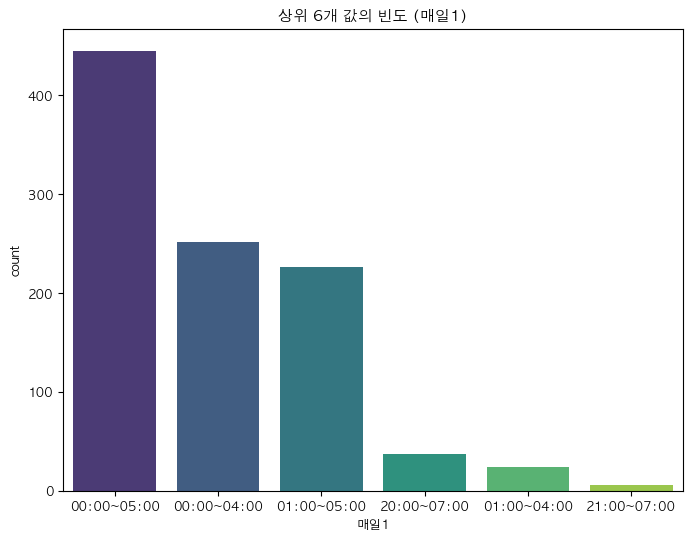

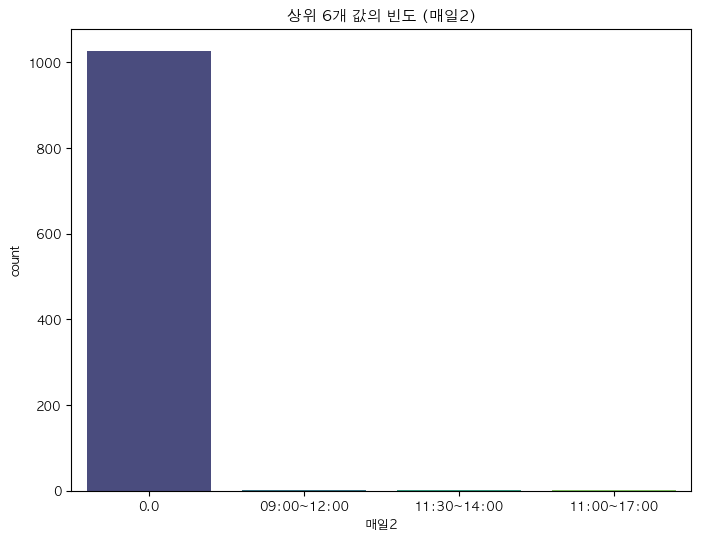

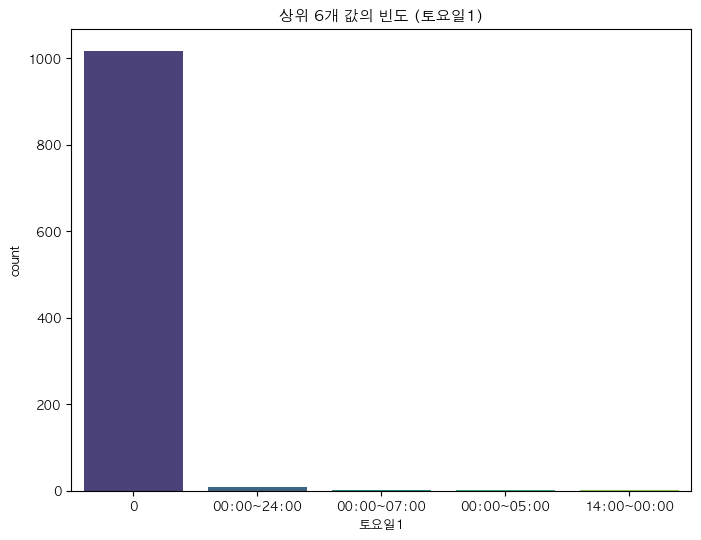

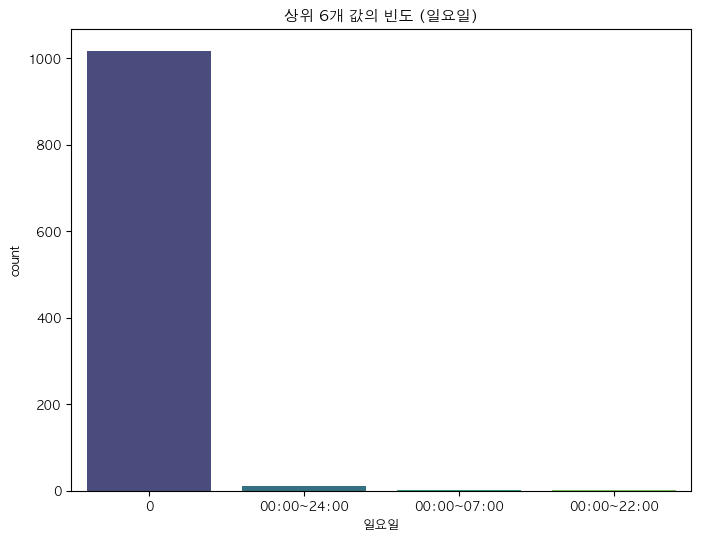

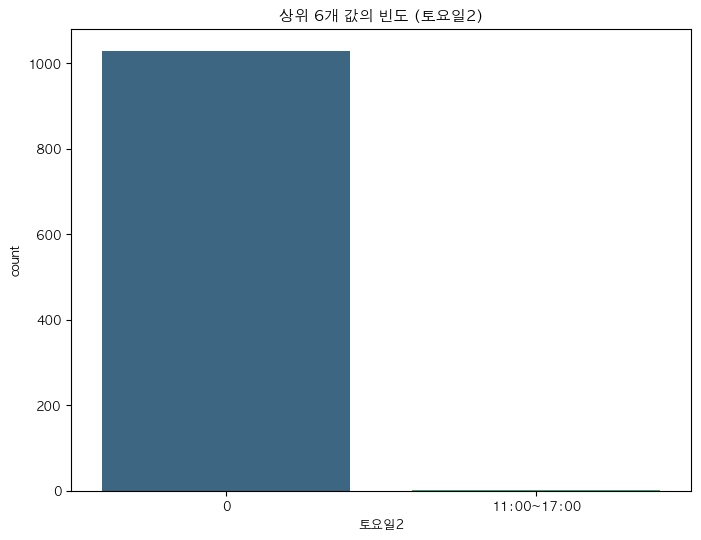

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams['font.size'] = 9

# 모든 컬럼에 대해 반복문으로 작업 수행
for column in res_time_sign.columns[4:9]:
    # 빈도순으로 상위 6개 값 추출
    top_values = res_time_sign[column].value_counts().head(6).index

    # 해당 값들로 필터링된 데이터프레임 생성
    df_filtered = res_time_sign[res_time_sign[column].isin(top_values)]

    # seaborn countplot 그리기
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_filtered, order=top_values, palette='viridis')
    plt.title(f'상위 6개 값의 빈도 ({column})')
    plt.show()

In [ ]:
#날짜값 들어있는 비고란 형식 수정


#### 생활인구 데이터 전처리

In [20]:
import pandas as pd

pe_2022 = pd.read_csv('/Users/kyuree/Desktop/pds_capstone1/dataset/생활인구2022.csv',header=1)

#남녀+연령로 구분되어있는 컬럼말고 자치구 코드, 총생활인구수, 시간대, 날짜 컬럼만 가져오기
pe_2022 = pe_2022.iloc[:, :4]
pe_2022

,20220101,0,11110,198013.1166
0,20220101,0,11140,163439.6365
1,20220101,0,11170,252165.9659
2,20220101,0,11200,312343.4234
3,20220101,0,11215,348524.3239
4,20220101,0,11230,331304.8412
...,...,...,...,...
218994,20221231,23,11620,468533.2179
218995,20221231,23,11650,464794.4332
218996,20221231,23,11680,626217.7021
218997,20221231,23,11710,726058.1872


In [24]:
#인코딩 오류로 인한 컬럼 재부여
# pe_cols = ['기준일ID','시간대구분','자치구코드','총생활인구수','']
pe_2022.columns= ['기준일ID','시간대구분','자치구코드','총생활인구수']
pe_2022

,기준일ID,시간대구분,자치구코드,총생활인구수
0,20220101,0,11140,163439.6365
1,20220101,0,11170,252165.9659
2,20220101,0,11200,312343.4234
3,20220101,0,11215,348524.3239
4,20220101,0,11230,331304.8412
...,...,...,...,...
218994,20221231,23,11620,468533.2179
218995,20221231,23,11650,464794.4332
218996,20221231,23,11680,626217.7021
218997,20221231,23,11710,726058.1872


In [28]:
#1. 야간시간대 22:00 ~ 06:00만 필터링, 남녀+연령로 구분되어있는 컬럼말고 자치구 코드, 총생활인구수, 시간대, 날짜 컬럼만 가져오기
# pe_2022['시간대구분'].unique()
night= [22,23,0,1,2,3,4,5,6]
pe_2022_night = pe_2022[pe_2022['시간대구분'].isin(night)][['기준일ID','시간대구분','자치구코드','총생활인구수']]
pe_2022_night['시간대구분'].unique()

array([ 0,  1,  2,  3,  4,  5,  6, 22, 23])

In [29]:
#2.자치구코드 -> 자치구명으로 값 변환
pe_2022_night['자치구코드'].unique()

array([11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320,
       11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545, 11560,
       11590, 11620, 11650, 11680, 11710, 11740, 11110])

In [35]:
gu_code = pd.read_excel('/Users/kyuree/Desktop/pds_capstone1/dataset/행정동코드_매핑정보_20200325 .xlsx',sheet_name='유입지코드')
gu_code=gu_code[gu_code['RESD_DO_NM']=='서울'].iloc[:,[0,2]]
gu_code.columns=['자치구코드','자치구명']
gu_code

,자치구코드,자치구명
0,11110,종로구
1,11140,중구
2,11170,용산구
3,11200,성동구
4,11215,광진구
5,11230,동대문구
6,11260,중랑구
7,11290,성북구
8,11305,강북구
9,11320,도봉구


In [38]:
#매핑하여 '자치구명' 컬럼 생성
pe_2022_night= pd.merge(pe_2022_night, gu_code[['자치구코드', '자치구명']], how='left', on='자치구코드')
pe_2022_night

,기준일ID,시간대구분,자치구코드,총생활인구수,자치구명
0,20220101,0,11140,163439.6365,중구
1,20220101,0,11170,252165.9659,용산구
2,20220101,0,11200,312343.4234,성동구
3,20220101,0,11215,348524.3239,광진구
4,20220101,0,11230,331304.8412,동대문구
...,...,...,...,...,...
82119,20221231,23,11620,468533.2179,관악구
82120,20221231,23,11650,464794.4332,서초구
82121,20221231,23,11680,626217.7021,강남구
82122,20221231,23,11710,726058.1872,송파구


In [44]:
#3. 기준일Id -> 년/ 월 /일로 구분하는 컬럼 생성
pe_2022_night['기준일ID']=pe_2022_night['기준일ID'].astype(str)

for i in range(len(pe_2022_night)):
    pe_2022_night.loc[i,'년도'] = pe_2022_night.loc[i,'기준일ID'][:4]
    pe_2022_night.loc[i,'월'] = pe_2022_night.loc[i,'기준일ID'][4:6]
    pe_2022_night.loc[i,'일'] = pe_2022_night.loc[i,'기준일ID'][6:]
pe_2022_night

,기준일ID,시간대구분,자치구코드,총생활인구수,자치구명,년도,월,일
0,20220101,0,11140,163439.6365,중구,2022,01,01
1,20220101,0,11170,252165.9659,용산구,2022,01,01
2,20220101,0,11200,312343.4234,성동구,2022,01,01
3,20220101,0,11215,348524.3239,광진구,2022,01,01
4,20220101,0,11230,331304.8412,동대문구,2022,01,01
...,...,...,...,...,...,...,...,...
82119,20221231,23,11620,468533.2179,관악구,2022,12,31
82120,20221231,23,11650,464794.4332,서초구,2022,12,31
82121,20221231,23,11680,626217.7021,강남구,2022,12,31
82122,20221231,23,11710,726058.1872,송파구,2022,12,31


In [46]:
#전처리된 최종 파일 csv로 저장
res_pe_2022_night = pe_2022_night[['년도','월','일','자치구명','시간대구분','총생활인구수']]
res_pe_2022_night

res_pe_2022_night.to_csv('kr_생활인구2022데이터_전처리.csv', index=False)